Masukkan batas bawah interval (a): 3
Masukkan batas atas interval (b): 8
Masukkan rentang awal epsilon: 0.001
Masukkan rentang akhir epsilon: 0.0040
Nilai epsilon sebesar: 0.0012751174873953512
+---------+----------+----------+----------+-----------+-----------+-----------+----------+
| Iterasi |    a     |    b     |    c     |    f(a)   |    f(b)   |    f(c)   |  Galat   |
+---------+----------+----------+----------+-----------+-----------+-----------+----------+
|    0    | 3.000000 | 8.000000 | 3.333333 | -2.000000 | 28.000000 | -1.555556 |   inf    |
|    1    | 3.333333 | 8.000000 | 3.578947 | -1.555556 | 28.000000 | -1.085873 | 0.245614 |
|    2    | 3.578947 | 8.000000 | 3.744000 | -1.085873 | 28.000000 | -0.702464 | 0.165053 |
|    3    | 3.744000 | 8.000000 | 3.848161 | -0.702464 | 28.000000 | -0.432461 | 0.104161 |
|    4    | 3.848161 | 8.000000 | 3.911311 | -0.432461 | 28.000000 | -0.258200 | 0.063150 |
|    5    | 3.911311 | 8.000000 | 3.948670 | -0.258200 | 28.000000 | -

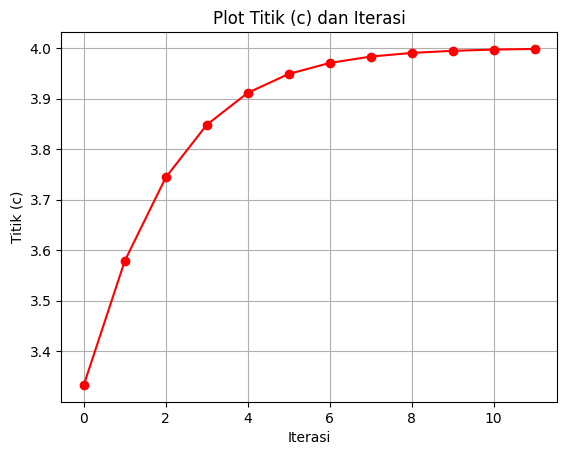

In [8]:
import random
import numpy as np
from prettytable import PrettyTable
import math
import matplotlib.pyplot as plt

def regula_falsi(f, a, b, epsilon):
    fa = f(a)
    fb = f(b)

    table = PrettyTable()
    table.field_names = ["Iterasi", "a", "b", "c", "f(a)", "f(b)", "f(c)", "Galat"]
    # Mulai dari -1 karena iterasi pertama adalah sebelum masuk ke loop
    iterasi = -1
    titik = []

    while True:
        c = b - ((fb * (b - a)) / (fb - fa))
        fc = f(c)

        iterasi += 1
        if iterasi == 0:
            galat = math.inf
        else:
            galat = abs(c - c_old)

        table.add_row([iterasi, format(a, ".6f"), format(b, ".6f"), format(c, ".6f"), format(fa, ".6f"), format(fb, ".6f"), format(fc, ".6f"), format(galat, ".6f")])

        if abs(fc) <= epsilon or galat <= epsilon:
            break

        if fc * fa < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        c_old = c
        titik.append(c)

    print(table)

    return c, titik

# Input persamaan fungsi f(x)
def f(x):
    return (x ** 2) - (5 * x) + 4

# Input interval a dan b
a = float(input("Masukkan batas bawah interval (a): "))
b = float(input("Masukkan batas atas interval (b): "))

# Input galat (epsilon)
awal = float(input("Masukkan rentang awal epsilon: "))
akhir = float(input("Masukkan rentang akhir epsilon: "))
epsilon = np.random.uniform(awal, akhir)
print('Nilai epsilon sebesar:', epsilon)

# Mencari akar persamaan dengan metode Regula Falsi
akar, titik = regula_falsi(f, a, b, epsilon)

print("Akar persamaan:", format(akar, ".6f"))

# Plot sumbu y adalah c dan sumbu x adalah iterasi
plt.plot(titik, 'ro-')
plt.xlabel('Iterasi')
plt.ylabel('Titik (c)')
plt.title('Plot Titik (c) dan Iterasi')
plt.grid(True)
plt.show()
